In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.customerID.value_counts()

9065-ZCPQX    1
7816-VGHTO    1
2908-WGAXL    1
2947-DOMLJ    1
3156-QLHBO    1
             ..
1353-LJWEM    1
7789-CRUVC    1
3739-YBWAB    1
4918-FYJNT    1
5180-UCIIQ    1
Name: customerID, Length: 7043, dtype: int64

In [4]:
df=df.drop(['customerID'],axis=1)

In [5]:
df.shape

(7043, 20)

In [6]:
df.isnull().values.any()

False

In [7]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
dicty={}
for j in ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
          'OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']:
    for i in df[[j]]:
        dicto={}
        for j in range(len(df[i].unique())):
            dicto[df[i].unique()[j]]=j
        dicty[i]=dicto
dicty

{'gender': {'Female': 0, 'Male': 1},
 'Partner': {'Yes': 0, 'No': 1},
 'Dependents': {'No': 0, 'Yes': 1},
 'PhoneService': {'No': 0, 'Yes': 1},
 'MultipleLines': {'No phone service': 0, 'No': 1, 'Yes': 2},
 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 'OnlineSecurity': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'OnlineBackup': {'Yes': 0, 'No': 1, 'No internet service': 2},
 'DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'TechSupport': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'StreamingTV': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'StreamingMovies': {'No': 0, 'Yes': 1, 'No internet service': 2},
 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 'PaperlessBilling': {'Yes': 0, 'No': 1},
 'PaymentMethod': {'Electronic check': 0,
  'Mailed check': 1,
  'Bank transfer (automatic)': 2,
  'Credit card (automatic)': 3},
 'Churn': {'No': 0, 'Yes': 1}}

In [9]:
dicty['MultipleLines']['No']=0
dicty['OnlineSecurity']['No internet service']=0
dicty['OnlineBackup']['No internet service']=1
dicty['DeviceProtection']['No internet service']=0
dicty['TechSupport']['No internet service']=0
dicty['StreamingTV']['No internet service']=0
dicty['StreamingMovies']['No internet service']=0
dicty

{'gender': {'Female': 0, 'Male': 1},
 'Partner': {'Yes': 0, 'No': 1},
 'Dependents': {'No': 0, 'Yes': 1},
 'PhoneService': {'No': 0, 'Yes': 1},
 'MultipleLines': {'No phone service': 0, 'No': 0, 'Yes': 2},
 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 'OnlineSecurity': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'OnlineBackup': {'Yes': 0, 'No': 1, 'No internet service': 1},
 'DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'TechSupport': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'StreamingTV': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'StreamingMovies': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 'PaperlessBilling': {'Yes': 0, 'No': 1},
 'PaymentMethod': {'Electronic check': 0,
  'Mailed check': 1,
  'Bank transfer (automatic)': 2,
  'Credit card (automatic)': 3},
 'Churn': {'No': 0, 'Yes': 1}}

In [10]:
for j in ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
          'OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']:
    for i in [j]:
        df[i]=df[i].apply(lambda x:dicty[i][x])

In [11]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,34,1,0,0,1,1,1,0,0,0,1,1,1,56.95,1889.5,0
2,1,0,1,0,2,1,0,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,0,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,1990.5,0
7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,7362.9,0
7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,346.45,0
7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,74.40,306.6,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [13]:
for i in ['TotalCharges']:
    if 0<len(df[df[i]==' ']):
        print(i)
        print(len(df[df[i]==' ']))

TotalCharges
11


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

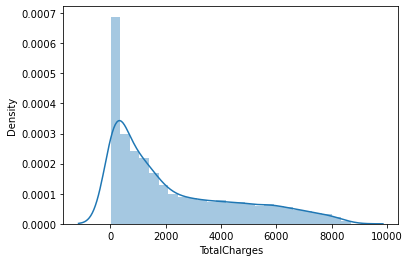

In [14]:
sn.distplot(df[df['TotalCharges']!=' ']['TotalCharges'])

In [15]:
fill=df[df['TotalCharges']!=' '].astype({'TotalCharges': np.float64})['TotalCharges'].mean()
for i in range(len(df['TotalCharges'])):
    if df['TotalCharges'][i]==' ':
        df['TotalCharges'][i]=fill

In [16]:
df = df.astype({'TotalCharges': np.float64})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [18]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.516967,0.299588,32.371149,0.903166,0.843675,0.872923,0.286668,0.655119,0.343888,0.290217,0.384353,0.387903,0.690473,0.407781,1.315633,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.987776,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.148907,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [19]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Churn No  vs Yes')

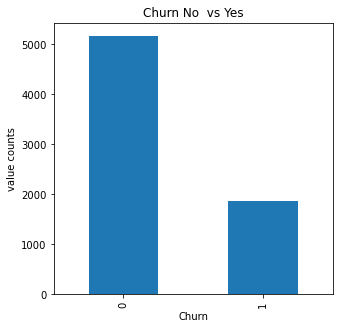

In [20]:
plt.figure(figsize=[5,5])
df['Churn'].value_counts().plot(kind='bar')
plt.xlabel("Churn")
plt.ylabel('value counts')
plt.title('Churn No  vs Yes')

In [22]:
from sklearn.utils import resample
dfmin=df[df['Churn']==1]
dfmax=df[df['Churn']==0]
dfminup=resample(dfmin,replace=True,n_samples=5174,random_state=123)
dff=pd.concat([dfmax, dfminup])
print('Number of Churn no are:',dff['Churn'].value_counts()[0])
print('Number of Churn yes are:',dff['Churn'].value_counts()[1])
print('Unbalanced dataset' if dff['Churn'].value_counts()[0]!=dff['Churn'].value_counts()[1] else 'Balanced dataset')

Number of Churn no are: 5174
Number of Churn yes are: 5174
Balanced dataset


Text(0.5, 1.0, 'Churn No  vs Yes')

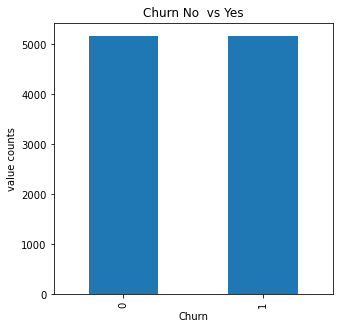

In [23]:
plt.figure(figsize=[5,5])
dff['Churn'].value_counts().plot(kind='bar')
plt.xlabel("Churn")
plt.ylabel('value counts')
plt.title('Churn No  vs Yes')

In [24]:
dff.corr()['Churn']

gender             -0.011790
SeniorCitizen       0.158551
Partner             0.190106
Dependents         -0.193446
tenure             -0.414914
PhoneService        0.013177
MultipleLines       0.026018
InternetService    -0.064153
OnlineSecurity     -0.218112
OnlineBackup        0.086678
DeviceProtection   -0.082588
TechSupport        -0.202603
StreamingTV         0.068466
StreamingMovies     0.051005
Contract           -0.486865
PaperlessBilling   -0.223647
PaymentMethod      -0.303202
MonthlyCharges      0.223598
TotalCharges       -0.244420
Churn               1.000000
Name: Churn, dtype: float64

<AxesSubplot:>

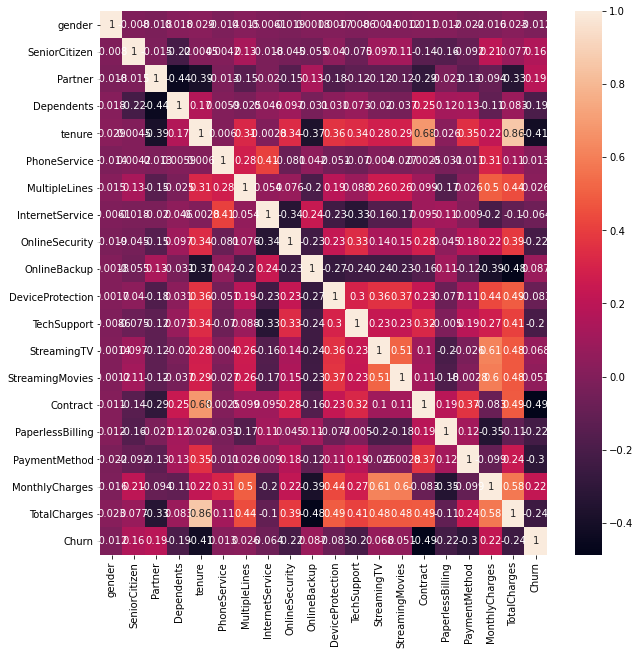

In [25]:
plt.figure(figsize=[10,10])
sn.heatmap(dff.corr(),annot=True)

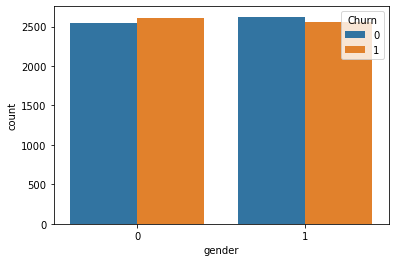

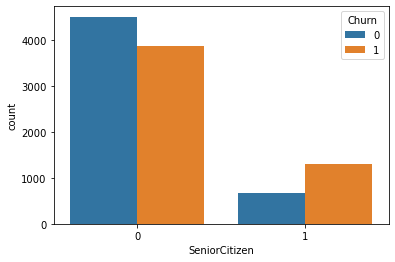

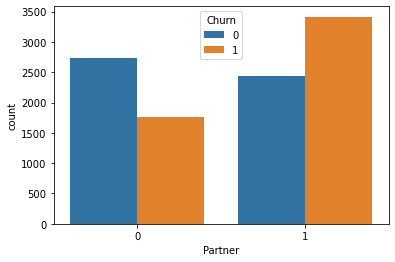

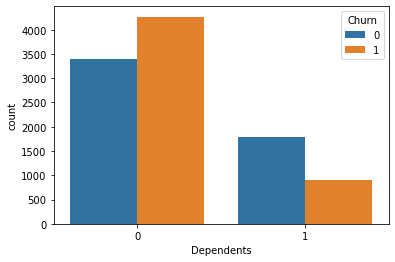

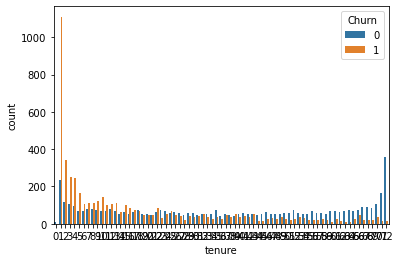

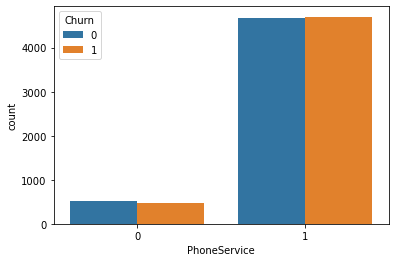

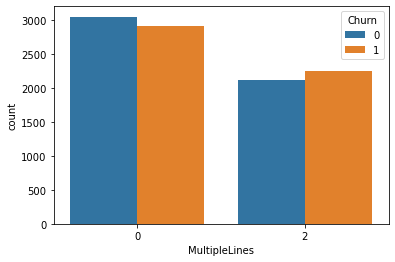

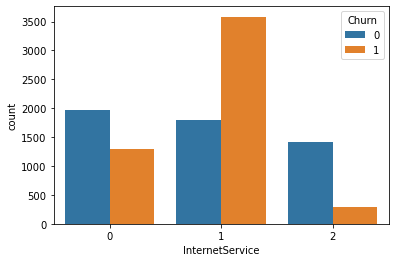

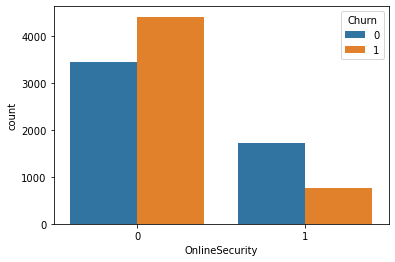

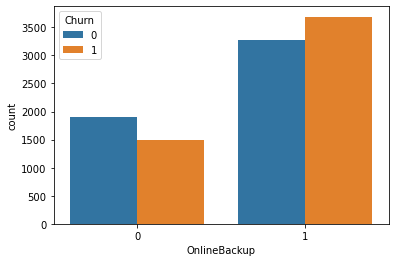

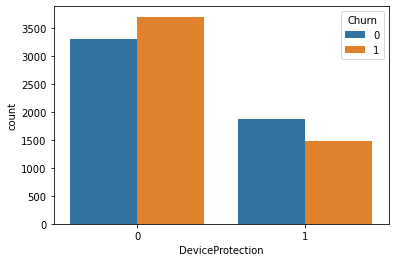

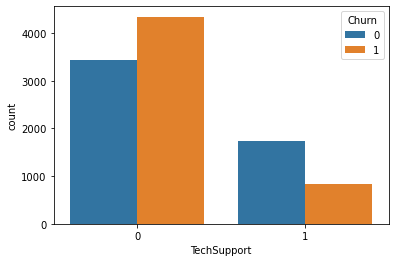

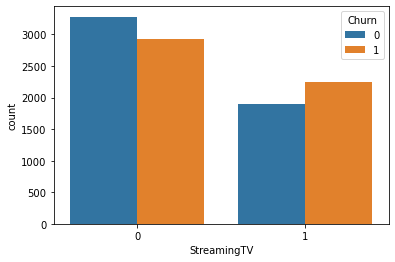

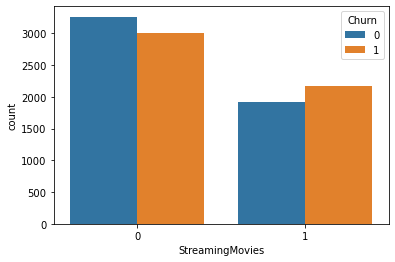

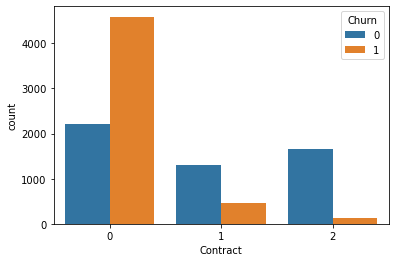

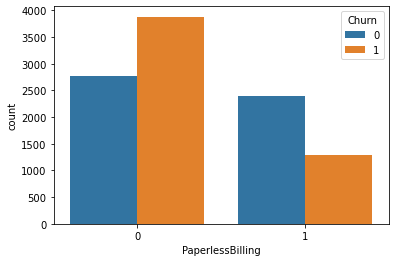

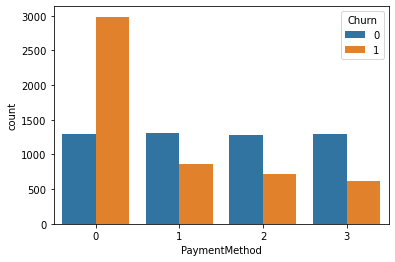

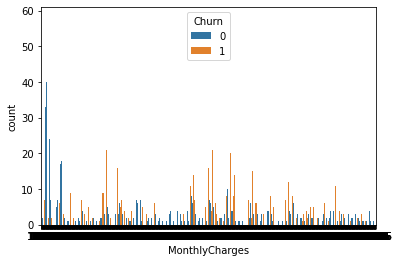

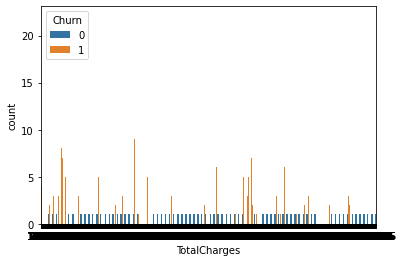

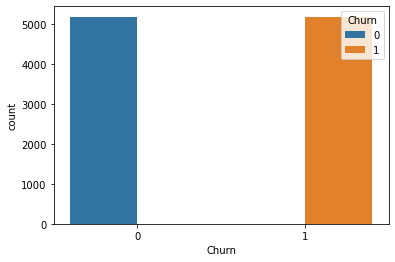

In [26]:
for i in dff.columns:
    sn.countplot(x=i,hue="Churn",data=dff)
    plt.show()

In [27]:
dff=dff.drop(['MultipleLines','PhoneService','gender'],axis=1)

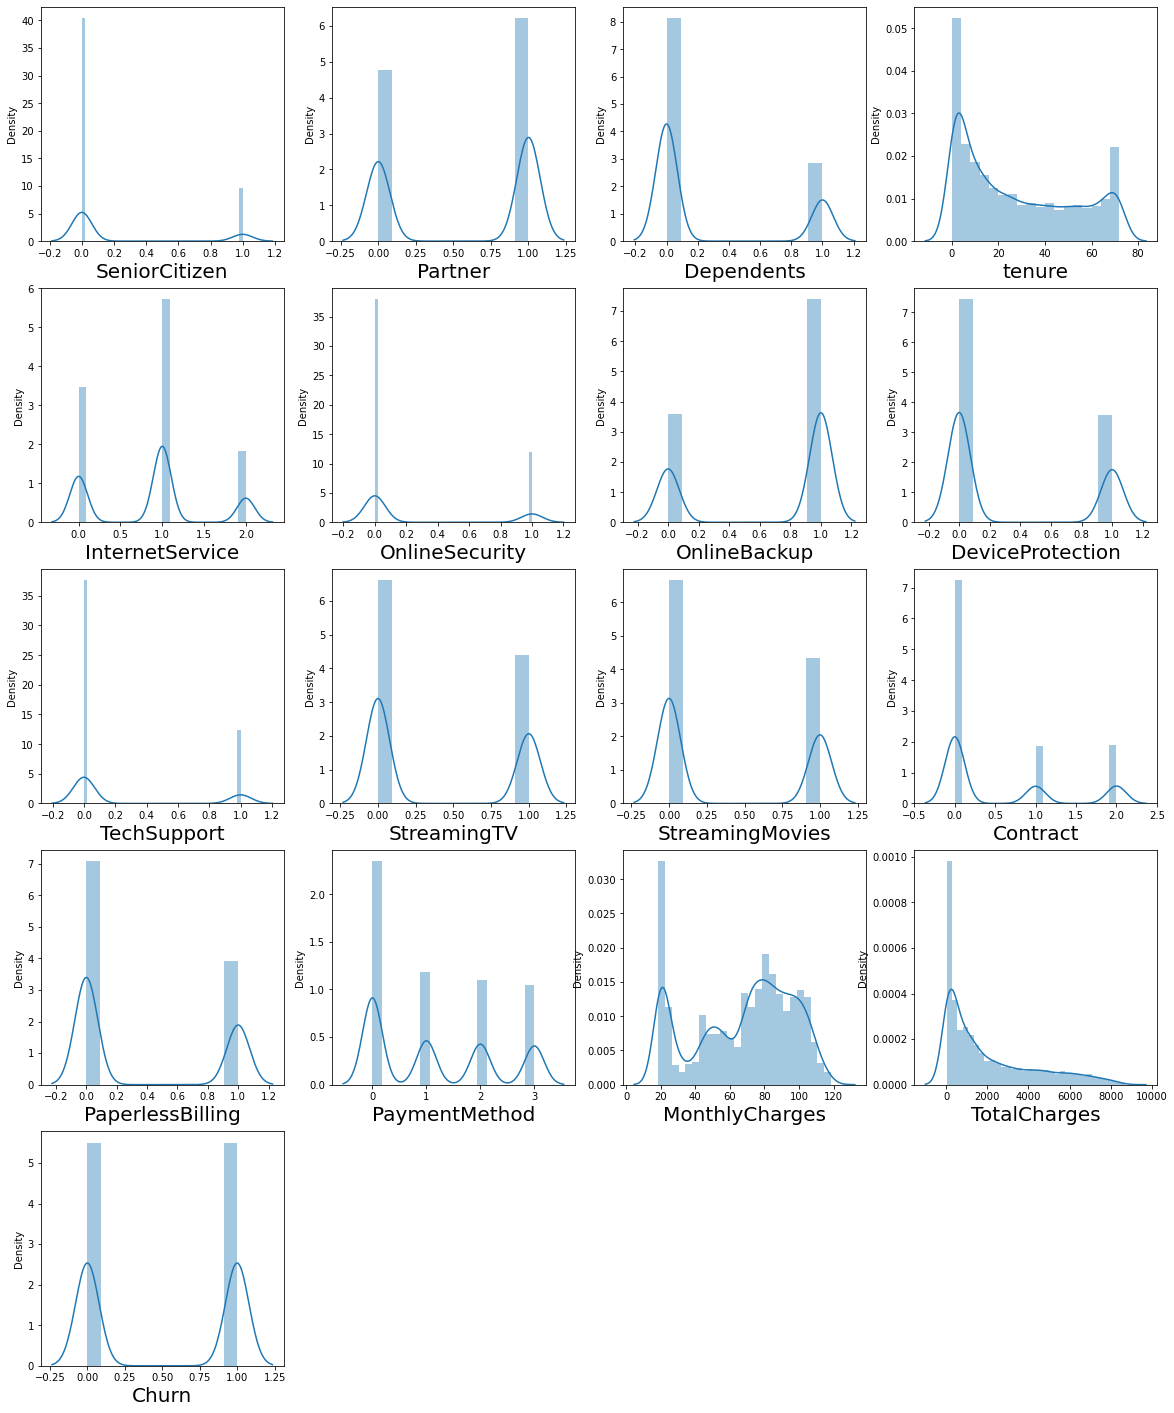

In [28]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in dff.columns:
    if plotnumber<=len(dff.columns):
        ax=plt.subplot(5,4,plotnumber)
        sn.distplot(dff[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

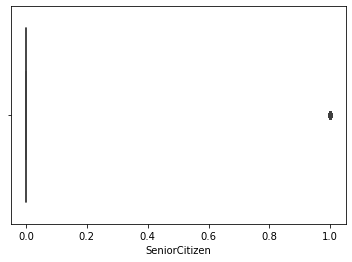

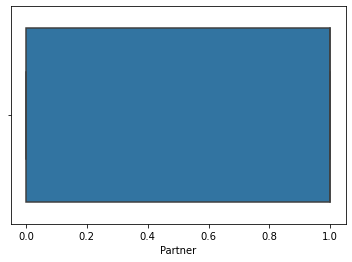

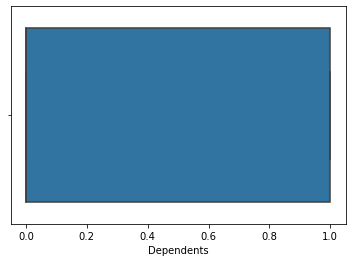

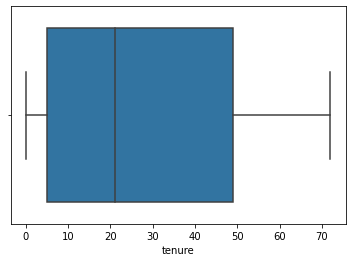

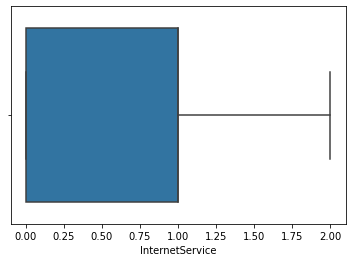

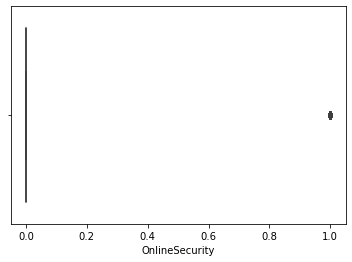

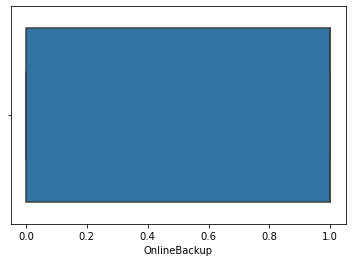

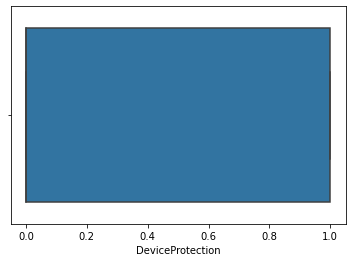

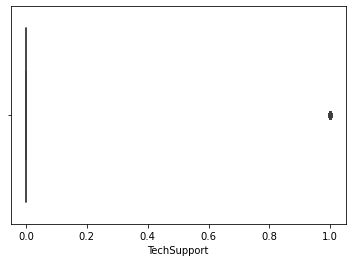

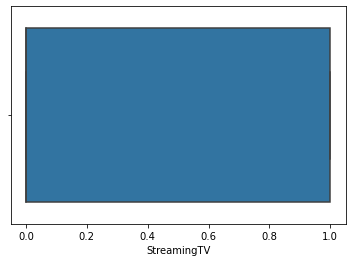

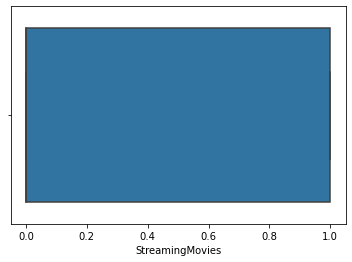

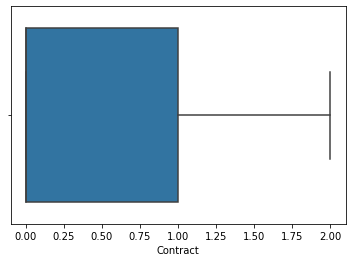

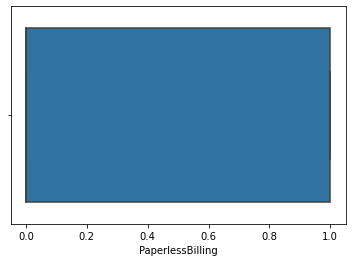

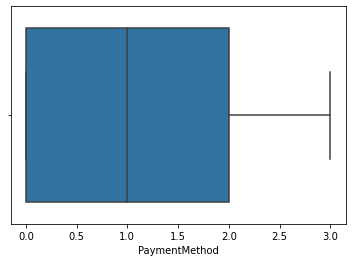

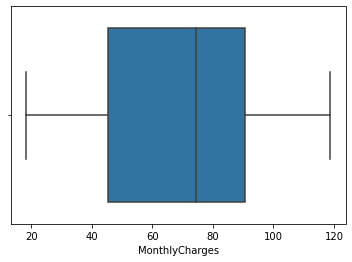

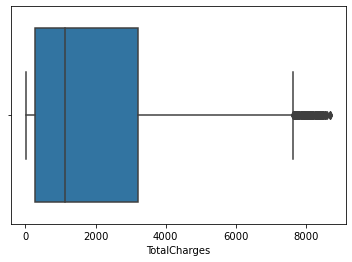

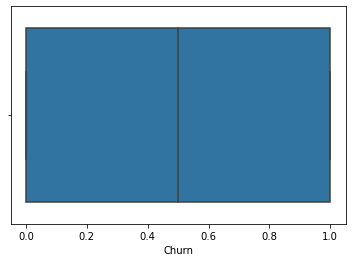

In [29]:
for i in dff.columns:
    sn.boxplot(dff[i])
    plt.show()

In [30]:
y = dff[['Churn']]
x = dff.drop(columns = ['Churn'])

In [31]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

SeniorCitizen       1.571968
Partner            -0.266382
Dependents          1.094739
tenure              0.518136
InternetService     0.190745
OnlineSecurity      1.217440
OnlineBackup       -0.734293
DeviceProtection    0.751658
TechSupport         1.169220
StreamingTV         0.410857
StreamingMovies     0.430245
Contract            1.081034
PaperlessBilling    0.595807
PaymentMethod       0.436176
MonthlyCharges     -0.382938
TotalCharges        1.136185
dtype: float64
8


In [32]:
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [33]:
print(x.skew())
print(len(x.skew().loc[x.skew()>0.55]))

SeniorCitizen       1.571968
Partner            -0.266382
Dependents          1.094739
tenure              0.518136
InternetService     0.190745
OnlineSecurity      1.217440
OnlineBackup       -0.734293
DeviceProtection    0.751658
TechSupport         1.169220
StreamingTV         0.410857
StreamingMovies     0.430245
Contract            0.728134
PaperlessBilling    0.595807
PaymentMethod       0.436176
MonthlyCharges     -0.382938
TotalCharges        0.152955
dtype: float64
7


In [36]:
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

               Specs         Score
3             tenure  37406.051509
14    MonthlyCharges   6293.755511
11          Contract   1908.463559
15      TotalCharges   1779.462041
13     PaymentMethod   1095.394143
5     OnlineSecurity    374.112721
12  PaperlessBilling    332.670003
8        TechSupport    319.557160
2         Dependents    286.573978
0      SeniorCitizen    210.432473


In [37]:
newdf=x[['tenure','MonthlyCharges','Contract','TotalCharges','PaymentMethod']]
newdf['Churn']=y
newdf

,tenure,MonthlyCharges,Contract,TotalCharges,PaymentMethod,Churn
0,1,29.85,0.0,3.102045,0,0
1,34,56.95,1.0,12.362766,1,0
3,45,42.30,1.0,12.255516,2,0
6,22,89.10,0.0,12.492048,3,0
7,10,29.75,0.0,6.708432,1,0
...,...,...,...,...,...,...
6526,49,100.60,1.0,17.178793,2,1
3301,1,69.60,0.0,4.113420,0,1
3621,2,24.40,0.0,3.318658,1,1
6600,3,29.70,0.0,4.509445,3,1


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newdf[['MonthlyCharges','TotalCharges']] = scaler.fit_transform(newdf[['MonthlyCharges','TotalCharges']])

In [39]:
y = newdf[['Churn']]
x = newdf.drop(columns = ['Churn'])

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        tmp=roc_auc_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum roc_auc_score is at random state :",random," and it is :",score)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier

models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),RidgeClassifier(),
        BaggingClassifier(),GradientBoostingClassifier(),SGDClassifier(),
       LGBMClassifier(),XGBClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),
       QuadraticDiscriminantAnalysis(),CalibratedClassifierCV(),LinearSVC(),NuSVC(),
       LinearDiscriminantAnalysis(),RidgeClassifierCV(),GaussianNB(),BernoulliNB(),
        PassiveAggressiveClassifier(),Perceptron(),DummyClassifier()]

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 42,test_size=0.20,stratify=y)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='roc_auc')
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if roc_auc_score(y_test,y_pred)>score:
        diff=roc_auc_score(y_test,y_pred)-score
        print('roc bigger')
    else:
        diff=score-roc_auc_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('roc',roc_auc_score(y_test,y_pred))
    print('diff',diff)

**********
LogisticRegression()
score 0.8345554665362236
roc 0.7671497584541063
diff 0.06740570808211732
roc bigger
**********
DecisionTreeClassifier()
score 0.8493882981005004
roc 0.8855072463768116
diff 0.036118948276311125
**********
KNeighborsClassifier()
score 0.8419302989565196
roc 0.7888888888888888
diff 0.053041410067630856
**********
RandomForestClassifier()
score 0.9379211690991139
roc 0.8922705314009662
diff 0.0456506376981477
**********
SVC()
score 0.8194314464085137
roc 0.7502415458937197
diff 0.06918990051479401
**********
RidgeClassifier()
score 0.8348245605903332
roc 0.7623188405797102
diff 0.07250572001062294
**********
BaggingClassifier()
score 0.92329940429008
roc 0.888888888888889
diff 0.034410515401191
**********
GradientBoostingClassifier()
score 0.85487746818409
roc 0.7917874396135265
diff 0.06309002857056356
**********
SGDClassifier()
score 0.8059029055605208
roc 0.753623188405797
diff 0.05227971715472379
**********
LGBMClassifier()
score 0.8810124900655752
roc 

In [43]:
parameters={'criterion':['gini', 'entropy'],'max_features':['auto', 'sqrt', 'log2'],
            'max_depth':list(range(3,36))}
clf = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5,scoring="roc_auc",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 5 folds for each of 198 candidates, totalling 990 fits


{'criterion': 'entropy', 'max_depth': 35, 'max_features': 'auto'}

In [44]:
besttrain(ExtraTreesClassifier(max_depth=33,criterion='entropy',max_features='auto'),x,y)

maximum roc_auc_score is at random state : 99  and it is : 0.9101449275362319


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 99,test_size=0.20,stratify=y)
classmodel=ExtraTreesClassifier(max_depth=33,criterion='entropy',max_features='auto')
classmodel.fit(x_train,y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=33)

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
y_pred=classmodel.predict(x_test)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
scores=cross_val_score(classmodel,x,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[896 139]
 [ 49 986]]
f1 score is :  0.912962962962963
classification report 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      1035
           1       0.88      0.95      0.91      1035

    accuracy                           0.91      2070
   macro avg       0.91      0.91      0.91      2070
weighted avg       0.91      0.91      0.91      2070

AUC ROC Score:  0.9091787439613526
CV mean 0.9683460436593204
std: 0.004055654266737548


In [47]:
y_pred=classmodel.predict(x)
print("Confusion matrix \n",confusion_matrix(y,y_pred))
print("f1 score is : ",f1_score(y,y_pred))
print("classification report \n",classification_report(y,y_pred))
print("AUC ROC Score: ",roc_auc_score(y,y_pred))
scores=cross_val_score(classmodel,x,y,cv=5,scoring='roc_auc')
score=np.mean(scores)
std=np.std(scores)
print('CV mean',score)
print('std:',std)

Confusion matrix 
 [[4998  176]
 [  61 5113]]
f1 score is :  0.977348752747778
classification report 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      5174
           1       0.97      0.99      0.98      5174

    accuracy                           0.98     10348
   macro avg       0.98      0.98      0.98     10348
weighted avg       0.98      0.98      0.98     10348

AUC ROC Score:  0.9770970235794355
CV mean 0.9685379110748
std: 0.003294702131218997


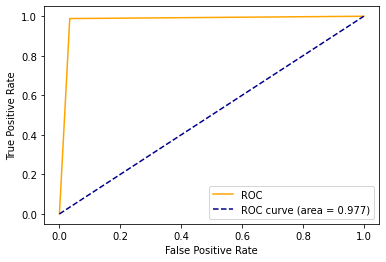

In [48]:
fpr, tpr, threshold = roc_curve(y,y_pred)
auc = roc_auc_score(y,y_pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [49]:
x['Churnp']=y_pred
x['Churn']=y
x[['Churn','Churnp']]

,Churn,Churnp
0,0,0
1,0,0
3,0,0
6,0,0
7,0,0
...,...,...
6526,1,1
3301,1,1
3621,1,1
6600,1,1


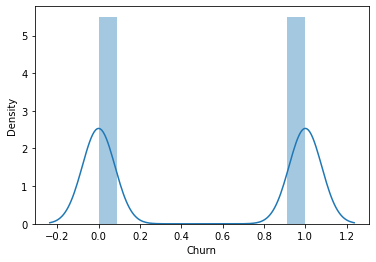

<AxesSubplot:xlabel='Churnp', ylabel='Density'>

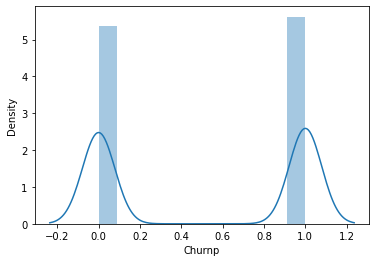

In [50]:
sn.distplot(x['Churn'])
plt.show()
sn.distplot(x['Churnp'])

<AxesSubplot:>

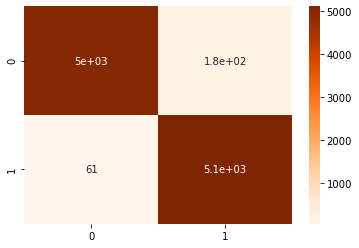

In [51]:
sn.heatmap(confusion_matrix(x['Churn'],x['Churnp']),annot=True,cmap="Oranges",xticklabels=classmodel.classes_
               ,yticklabels=classmodel.classes_)

In [52]:
print("Confusion matrix \n",confusion_matrix(x['Churn'],x['Churnp']))

Confusion matrix 
 [[4998  176]
 [  61 5113]]


In [53]:
print('Number of falsely predicted churn status as no: 61')

Number of falsely predicted churn status as no: 61


In [54]:
print('Number of falsely predicted churn status as yes: 175')

Number of falsely predicted churn status as yes: 175


In [55]:
x.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [56]:
x.Churnp.value_counts()

1    5289
0    5059
Name: Churnp, dtype: int64

In [57]:
import joblib #Save model
joblib.dump(classmodel, 'churn.pkl')

['churn.pkl']